In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Cliente/anaconda3/Library/bin/graphviz'

# Leitura e limpeza dos dados do CSV

In [2]:
import pandas as pd

dados = pd.read_csv('acesso.csv')

dados.head()

,acessou_home,acessou_como_funciona,acessou_contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [3]:
# Redefiniçaõ do nome das colunas para facilitar
mapa = {
    "acessou_home" : "home",
    "acessou_como_funciona" : "funciona",
    "acessou_contato" : "contato"
}

dados = dados.rename(columns = mapa)

dados.head()

,home,funciona,contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


## Separação dos dados
 - Dados de análise
 - Labels de resultados

In [4]:
x = dados[["home", "funciona", "contato"]]
y = dados["comprou"]

## Divisão entre teste e treino

In [5]:
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 74 elementos e testaremos com 25 elementos


# Inicio das análises dos modelos

## Classificador Bobo

In [6]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()

dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto do dummy_stratified foi %.2f%%" % taxa_acerto)

A taxa de acerto do dummy_stratified foi 52.00%


C:\Users\Cliente\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


## Classificador Bayesiano

In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto foi %.2f%%" % taxa_acerto)

A taxa de acerto foi 92.00%


## Classificador Linear

In [7]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto foi %.2f%%" % taxa_acerto)

A taxa de acerto foi 100.00%


## Classificador Não-Linear

In [8]:
from sklearn.svm import SVC

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto foi %.2f%%" % taxa_acerto)

A taxa de acerto foi 100.00%


## Classificador de Árvore de Decisão

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto foi %.2f%%" % taxa_acerto)

A taxa de acerto foi 100.00%


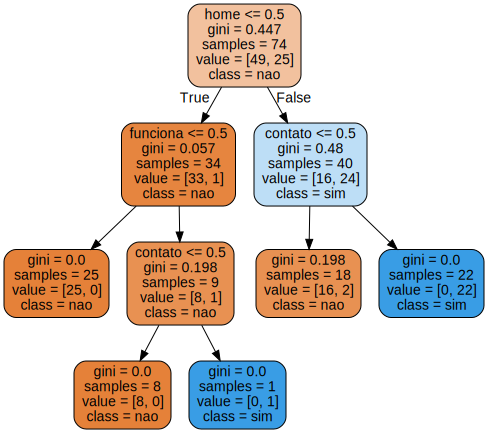

In [12]:
# Libs para vizualização da estrutura da árvore de decisão
from sklearn.tree import export_graphviz
import graphviz

# Colocar o nome das colunas na árvore
features = x.columns

dot_data = export_graphviz(model, 
                           filled=True, # colocar cor
                           rounded=True, # deixar arredondado
                           feature_names=features, # nomes das colunas
                           class_names=['nao', 'sim']) # resultado da classificação

grafico = graphviz.Source(dot_data)

grafico